In [1]:
import numpy as np
import matplotlib.pyplot as plt

# arm_input_train_data = np.load('/home/daniel/Documents/data/daniel_baloo_data_collection/noisy_pressure_data/parsed_csvs/not_smooth_all_inputs.npy')
arm_input_train_data = np.load("/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/data/good_data/test_data/validation_inputdata.npy")

print(arm_input_train_data.shape)

(100000, 36)


In [2]:
from moldy.case_studies.baloo_sim.model_baloo_sim import BalooSim

baloo_sys_id_model = BalooSim()

x_hardware = arm_input_train_data[:, :24] * baloo_sys_id_model.xMax
u_hardware = arm_input_train_data[:, -12:] * baloo_sys_id_model.uMax

start = 10000
num_points = 3000

dt = 0.01
# set initial x
x_sim = np.zeros((num_points, baloo_sys_id_model.numStates)) 
x = x_hardware[start,:].reshape((1, baloo_sys_id_model.numStates))

for i in range(1000):
    baloo_sys_id_model.forward_simulate_dt(x, x[0, :12], dt)

for i in range(start, num_points+start):
    x = baloo_sys_id_model.forward_simulate_dt(x, u_hardware[i,:], dt)
    x_sim[i-start, :] = x.flatten()

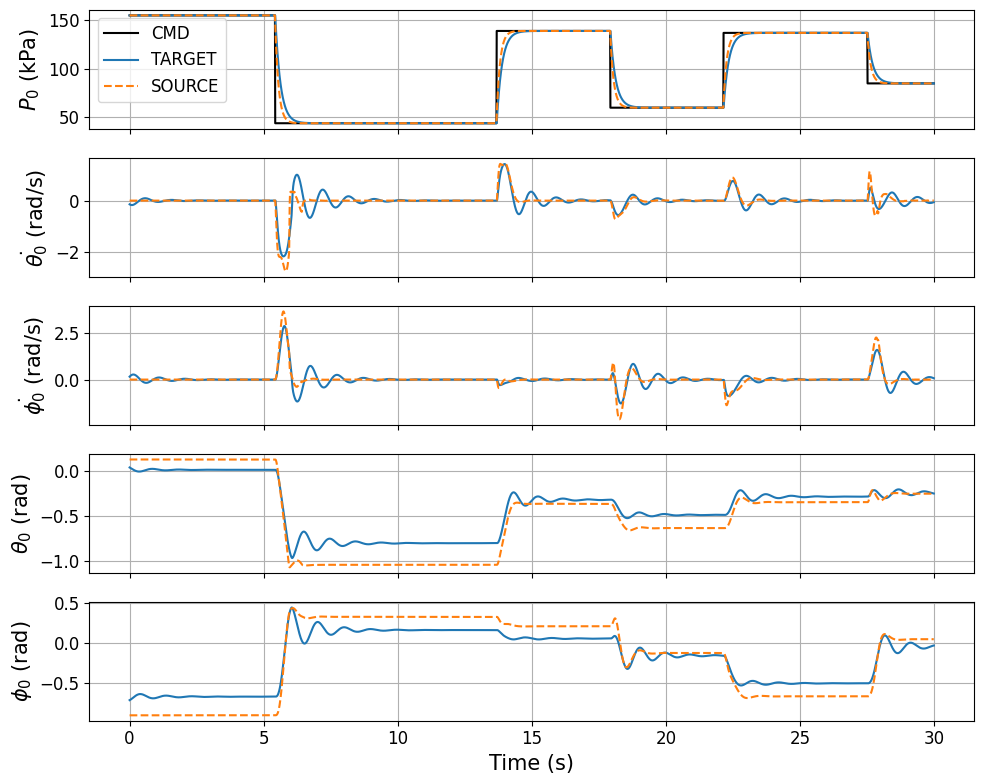

In [8]:
x_labels = ['p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'u0_dot', 'v0_dot', 'u1_dot', 'v1_dot', 'u2_dot', 'v2_dot', 'u0', 'v0', 'u1', 'v1', 'u2', 'v2']
u_labels = ['p0_cmd', 'p1_cmd', 'p2_cmd', 'p3_cmd', 'p4_cmd', 'p5_cmd', 'p6_cmd', 'p7_cmd', 'p8_cmd', 'p9_cmd', 'p10_cmd', 'p11_cmd']

import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 1, figsize=(10, 8), sharex=True)
plt.rcParams.update({'font.size': 12})
plt.rc('pdf',fonttype = 42)

t = np.arange(0, num_points*dt, dt)
label_font = 15
ax[0].plot(t, u_hardware[start:num_points+start, 0], "k", label='CMD')
ax[0].plot(t, x_hardware[start:num_points+start, 0], label='TARGET')
ax[0].plot(t, x_sim[:, 0], "--", c="tab:orange", label='SOURCE')
# ax[0].set_ylim([-5, 85])
ax[0].set_ylabel('$P_0$ (kPa)', fontsize=label_font)

# ax[1].plot(t, u_hardware[start:num_points+start, 1], "k", label='CMD')
# ax[1].plot(t, x_hardware[start:num_points+start, 1], label='HW')
# ax[1].plot(t, x_sim[:, 1], "--", c="tab:orange", label='Sim')
# # ax[1].set_ylim([-5, 85])
# ax[1].set_ylabel('$P_1$ (kPa)', fontsize=label_font)

ax[1].plot(t, x_hardware[start:num_points+start, 12], label='TARGET')
ax[1].plot(t, x_sim[:, 12], "--", c="tab:orange", label='SOURCE')
# ax[2].set_ylim([-1.25, 1.5])
ax[1].set_ylabel('$\\dot{\\theta_0}}$ (rad/s)', fontsize=label_font)

ax[2].plot(t, x_hardware[start:num_points+start, 13], label='TARGET')
ax[2].plot(t, x_sim[:, 13], "--", c="tab:orange", label='SOURCE')
# ax[3].set_ylim([-1.25, 1.5
ax[2].set_ylabel('$\\dot{\\phi_0}}$ (rad/s)', fontsize=label_font)

ax[3].plot(t, x_hardware[start:num_points+start, 18], label='TARGET')
ax[3].plot(t, x_sim[:, 18], "--", c="tab:orange", label='SOURCE')
# ax[4].set_ylim(-0.8, 0.5)
ax[3].set_ylabel('$\\theta_0$ (rad)', fontsize=label_font)

ax[4].plot(t, x_hardware[start:num_points+start, 19], label='TARGET')
ax[4].plot(t, x_sim[:, 19], "--", c="tab:orange", label='SOURCE')
# ax[5].set_ylim(-0.8, 0.5)
ax[4].set_ylabel('$\\phi_0$ (rad)', fontsize=label_font)

for i in range(5):
    ax[i].grid()

ax[0].legend()

plt.xlabel('Time (s)', fontsize=label_font)
plt.tight_layout()


plt.savefig('/home/daniel/catkin_ws/src/moldy/figure_generation/generated_figures/sim_sys_id_comparison_baloo.pdf', bbox_inches='tight')